# 5xFAD Resting State Analysis

Analysis of resting state EEG data from 5xFAD mice model.

## Setup and Dependencies

In [ ]:
using Pkg
Pkg.activate("../..")
Pkg.status()
include("../../modules/neuroephys4julia/session.jl")
include("../../../zzz configs/custom/plotify.jl")

  Activating project at `~/Documents/Kaizen/code/neuroelectrophysiology`


Status `~/Documents/Kaizen/code/neuroelectrophysiology/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.10
  [717857b8] DSP v0.8.4
  [a93c6f00] DataFrames v1.7.0
  [7a1cc6ca] FFTW v1.9.0
  [f67ccb44] HDF5 v0.17.2
  [0f8b85d8] JSON3 v1.14.3
  [91a5bcdd] Plots v1.40.17
⌃ [7f904dfe] PlutoUI v0.7.68
⌃ [2913bbd2] StatsBase v0.34.5
  [69a5ce3b] UnfoldMakie v0.5.19
  [29a6e085] Wavelets v0.10.1
  [37e2e46d] LinearAlgebra v1.11.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


plotify (generic function with 1 method)

### Load Sessions + Select

In [21]:
# load sessions
sessions = begin
	datapath = "5xFAD-resting-state-preprocessed"
	files = readdir(datapath)
	[from_hdf5(joinpath(datapath, file)) for file in files]
end

# display available files
println("Available session files:")
for (i, file) in enumerate(files)
    println("$i. $file")
end

┌ Info: raw: Transposing (35323, 6) to (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:131
┌ Info: preprocessed: Transposing (35323, 5) to (5, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:131
┌ Info: data: Permuting (100, 5, 3523) to (5, 100, 3523) [5 channels, 100 samples, 3523 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:182
┌ Info: raw: Keeping (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:134
┌ Info: preprocessed: Keeping (5, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:134
┌ Info: data: Permuting (5, 100, 3523) to (5, 100, 3523) [5 channels, 100 samples, 3523 trials]
└ @ Ma

Available session files:
1. 2023-08-25_14-20-15.h5
2. 2023-08-25_15-32-14.h5
3. 2023-08-25_16-48-03.h5
4. 2023-08-25_17-48-53.h5
5. 2023-08-25_18-47-30.h5
6. 2023-08-25_19-39-21.h5
7. 2023-08-25_20-33-11.h5
8. 2023-08-25_21-35-02.h5
9. 2023-08-25_22-02-17.h5
10. 2023-08-25_23-24-25.h5
11. 2023-08-26_00-12-57.h5
12. 2023-08-26_00-58-14.h5
13. 2023-08-26_01-43-12.h5
14. 2023-08-26_02-33-36.h5
15. 2023-09-06_15-06-20.h5
16. 2023-09-06_17-32-01.h5
17. 2023-09-06_19-26-36.h5


┌ Info: preprocessed: Keeping (5, 30521) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:134
┌ Info: data: Permuting (5, 100, 3043) to (5, 100, 3043) [5 channels, 100 samples, 3043 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:182
┌ Info: raw: Transposing (30450, 6) to (6, 30450) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:131
┌ Info: preprocessed: Transposing (30450, 5) to (5, 30450) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:131
┌ Info: data: Permuting (100, 5, 3036) to (5, 100, 3036) [5 channels, 100 samples, 3036 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/SessionIO.jl:182
┌ Info: raw: Keeping (6, 30450) [channels, samples]
└ @ Ma

In [22]:
# Select which session to analyze (change this index)
selected_file_index = 1
selection = files[selected_file_index]
name = splitext(selection)[1]
matching = filter(s -> s.session == name, sessions)
if isempty(matching)
	error("no session found with ID: $selection")
elseif length(matching) > 1
	@warn "Multiple sessions found with ID: $selection"
end
session = first(matching)
println("Session ID: $(session.session)")
println("Sampling Rate: $(session.sampling_rate) Hz")
println("Raw Shape: $(size(session.raw))")
println("Preprocessed Shape: $(size(session.preprocessed))")
println("Epoch Shapes: $(size(session.data))")
println("Good Channels: $(session.good_channels)")
println("Number of Good Channels: $(length(session.good_channels))")

Session ID: 2023-08-25_14-20-15
Sampling Rate: 100 Hz
Raw Shape: (6, 35323)
Preprocessed Shape: (5, 35323)
Epoch Shapes: (5, 100, 3523)
Good Channels: [1, 2, 3, 4, 5]
Number of Good Channels: 5


## Analysis
### Raw EEG Visualization

In [ ]:
# set sample range for visualization 
sample_start = 1
sample_end = 1000
sample_range = sample_start:sample_end
println("Visualizing samples $sample_start to $sample_end")

# generating plot
fig = Figure(size = (900, 450))
ax = plotify(
	fig,
	position = [1,1],
	title = "Raw Resting State EEG ($name)",
	xlabel = "Time (ms)",
	ylabel = "Amplitude"
)

time_ms = (sample_range .- 1) .* 10

data = session.raw
	
for channel in 1:size(data)[1]
	lines!(
		ax,
		time_ms,
		data[channel, sample_range],
		color = channel in session.good_channels ? (:darkcyan, 0.7) : (:red, 0.7),
		label = channel in session.good_channels ? "Channel $channel (good)" : "Channel $channel (bad)",
		linewidth = 2.1
	)
end
axislegend(ax)
fig

### Time-Frequency Plot

In [ ]:
using CairoMakie, FFTW

function compute_spectrogram(session, channel; overlap = 0.9)

    channels, samples, epochs = size(session.data)
    fs = session.sampling_rate
    nyquist = fs/2

    # RFFT
    freqs = rfftfreq(samples, fs)
    fmask = freqs .<= nyquist

    # power spectrogram
    power = zeros(length(freqs), epochs)
    for epoch in 1:epochs
        signal = session.data[channel, :, epoch]
        spectrum = abs2.(rfft(signal))
        power[:, epoch] .= spectrum[fmask]
    end

    epoch_duration = (samples * (1-overlap))/fs
    times = (0:epochs-1) .* epoch_duration

    return collect(times), freqs[fmask], power

end


compute_spectrogram (generic function with 2 methods)

In [85]:
time, freqs, power = compute_spectrogram(session)

fig = Figure(size=(800, 200 * size(power,1)))

for ch in 1:size(power,1)
    ax = Axis(
        fig[ch, 1], 
        title="Channel $ch",
        xlabel="Time (s)", 
        ylabel="Freq (Hz)"
    )
    heatmap!(ax, time, freqs, power[ch, :, :]; colormap=:viridis)
end

fig


MethodError: MethodError: no method matching adjust_axes(::CellGrid, ::Matrix{Float32}, ::Frequencies{Float64}, ::Matrix{Float64})
The function `adjust_axes` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  adjust_axes(!Matched::VertexGrid, ::Any, ::Any, ::Any)
   @ Makie ~/.julia/packages/Makie/FUAHr/src/conversions.jl:334
  adjust_axes(::CellGrid, !Matched::AbstractVector{T} where T<:Real, ::AbstractVector{T} where T<:Real, ::AbstractMatrix)
   @ Makie ~/.julia/packages/Makie/FUAHr/src/conversions.jl:327


### Bandpower Analysis

Implementation of multitaper spectral estimation and bandpower computation:

In [ ]:
using DSP, FFTW, Statistics

function bandpower(session::Session; NW=3.0, BANDS=nothing)
    if BANDS === nothing
        BANDS = Dict(
            "delta" => (1, 4),
            "theta" => (4, 8),
            "alpha" => (8, 12),
            "beta"  => (12, 25),
            "gamma" => (25, 50)
        )
    end

    channels, samples, epochs = size(session.data)
    fs = session.sampling_rate

    # precompute tapers and frequency bins
    K = Int(2*NW - 1)
    tapers = dpss(samples, NW, K)
    frequencies = rfftfreq(samples, fs)

    # prepare band masks
    band_names = collect(keys(BANDS))
    masks = [(frequencies .>= low) .& (frequencies .<= high) for (low, high) in values(BANDS)]

    # allocate output: (bands, channels, epochs)
    features = zeros(Float64, length(BANDS), channels, epochs)
    spectrum_sum = zeros(Float64, length(frequencies))  # reused buffer

    for epoch in 1:epochs
        for channel in 1:channels
            signal = session.data[channel, :, epoch]
            fill!(spectrum_sum, 0.0)

            # multitaper PSD
            for k in 1:K
                tapered = signal .* tapers[:, k]
                spectrum_sum .+= abs2.(rfft(tapered))
            end
            spectrum_sum ./= K

            # bandpower extraction
            for (idx, mask) in enumerate(masks)
                features[idx, channel, epoch] = sum(@view spectrum_sum[mask])
            end
        end
    end

    return features, band_names
end


bandpower (generic function with 1 method)

In [69]:
features, bands = bandpower(session)

([11.45509725719903 10.660244363264079 … 13.221502191698553 13.366001364770558; 11.434009705759648 11.125593954398349 … 13.884066367494626 13.379174691088997; … ; 7.056257549260263 3.1691724303210536 … 5.21579311901285 11.547459815640954; 9.978926987604584 6.593838873722758 … 5.7031872973884745 10.623067637313158;;; 0.5792089709976362 1.5567417102629573 … 4.62158241719626 4.577088468809802; 0.6136343938648154 1.5420230423199477 … 4.264662263753723 3.9840747889847066; … ; 1.1465591972873175 0.34469231963166225 … 0.8626253522613039 3.1275525382238465; 2.1588868560996093 1.2658040396466594 … 2.4163459505927363 5.664720882734462;;; 0.359671342286642 0.27483888248253263 … 0.29657227115652735 0.38542200105414764; 0.3196761620687396 0.2550769120567702 … 0.25929915177034096 0.331509271900141; … ; 0.38910702666507624 0.1415296049966061 … 0.26469324373258096 0.5038687238990389; 0.6149249768873737 0.7823880973480453 … 0.7123407843062645 1.5101564630139785;;; 36.47893662666634 36.697237622119914 …

### Bandpower Visualization

Visualize the computed bandpower features:

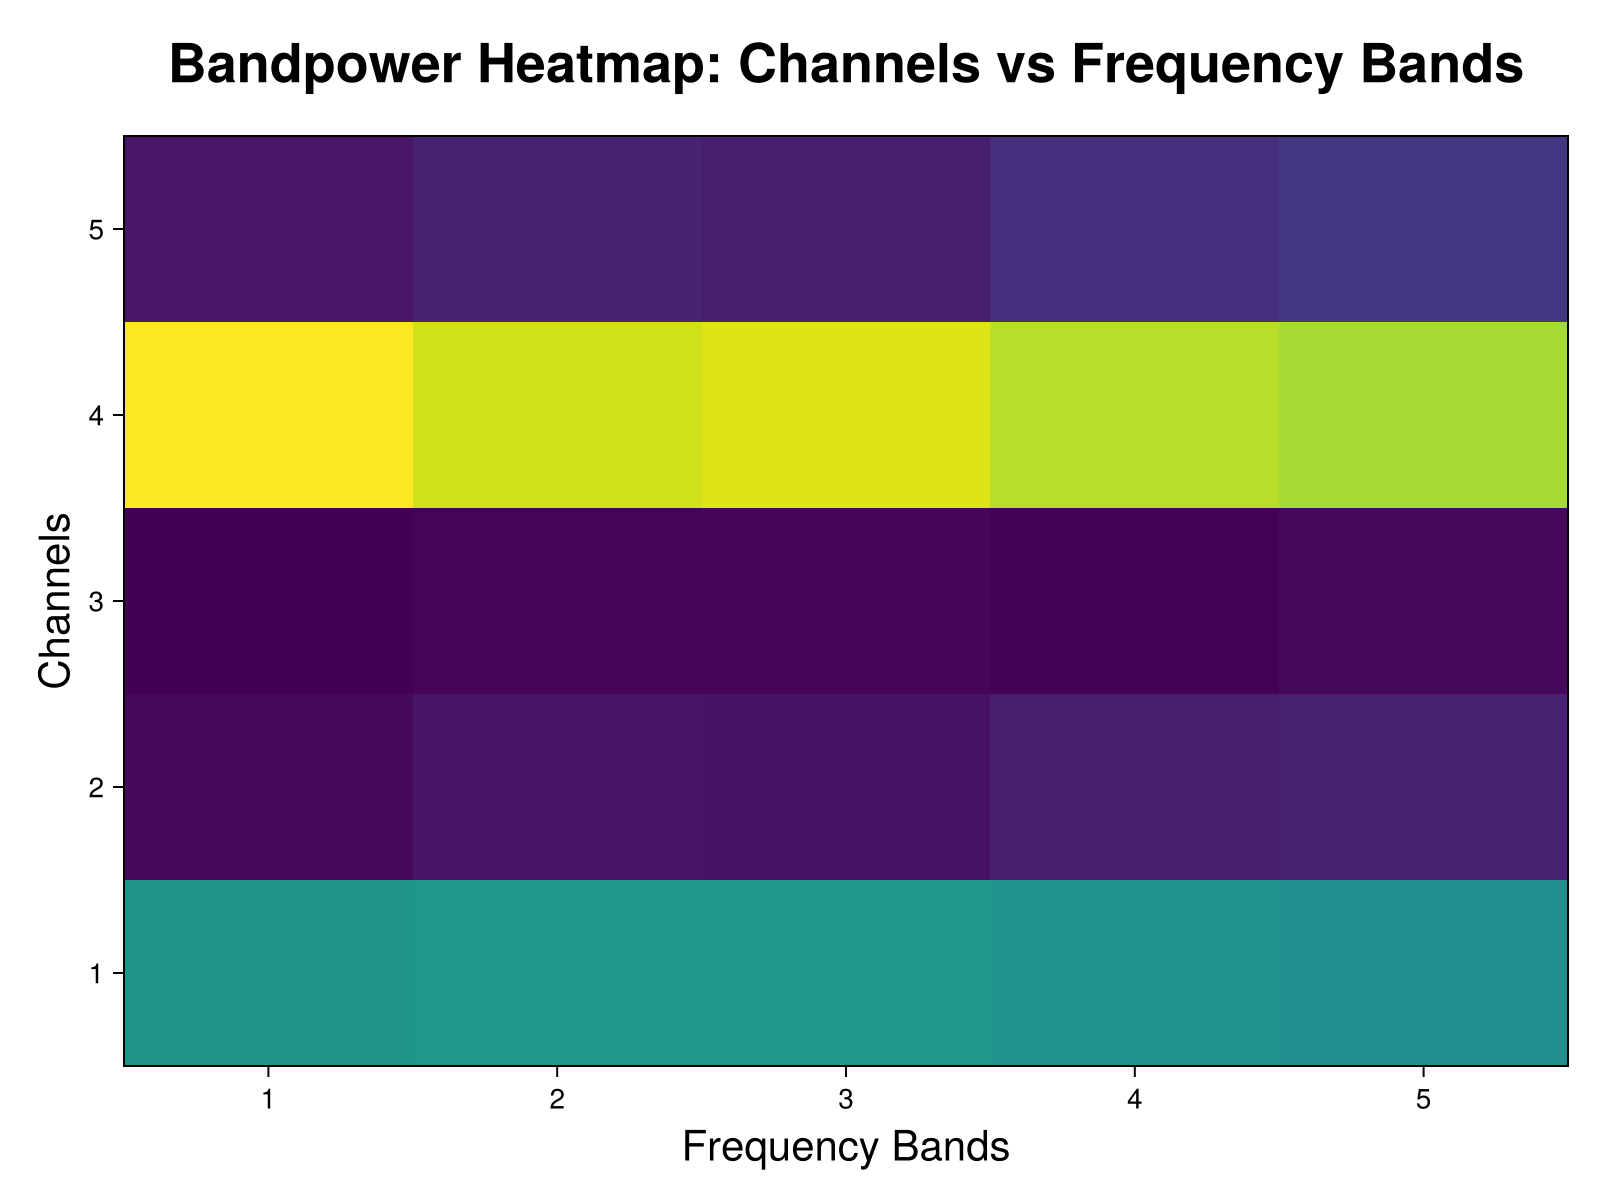

In [ ]:
# Heatmap: channels vs frequency bands
fig = Figure(size=(900, 600))

for channel in 1:size(features)[2]

    ax = plotify(
    fig, 
    position=[channel,1], 
    title="Bandpower Heatmap: Channel $(channel) vs Frequency Bands",
    ylabel="Power",
    )



# Average across epochs: [channels × bands]
power_matrix = mean(features, dims=1)[1, :, :]

heatmap!(ax, power_matrix, 
    colormap=:viridis)

fig